# Akeboshi, Wayne

For this quiz your knowledge on KNN, Linear Regression and Logistic Regression will be tested. 1 dataset will be used for the quiz for a classification problem. **Please leave your partial solutions and comment as to what you are trying to do in your solution so that you can get partial points**

# Classification using KNN & Logistic Regression

For telcos one of the business problems they face is customer churn. This means users have unsubscribed to their services in effect reducing their potential income. With this you are tasked to build a classifiation model using KNN & Logistic Regression. By having this model, the company is able to be more proactive in preventing customer churn. The dataset contains the following features

- customerId - unique identifier for customer
- gender - customer gender male/female
- SeniorCitizen	- indicator if customer is senior citizent 0/1
- Partner - Whether the customer has a partner or not (Yes, No)
- Dependents - Whether the customer has dependents or not (Yes, No)
- tenure - Number of months the customer has stayed with the company
- PhoneService - Whether the customer has a phone service or not (Yes, No)
- MultipleLines	- Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract - The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod	- The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - The amount charged to the customer monthly
- TotalCharges - The total amount charged to the customer
- Churn - Whether the customer churned or not (Yes or No)

For this dataset our model will be optimized based on the Churn field 

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.color_palette('Set2')
dlsu_green = "#117a65ff"

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [2]:
churn_df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
churn_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data Preprocessing

For us to load the data to the model we have to convert our categorical features into numeric

In [5]:
model_data = churn_df.copy(deep=True)

#remove customerId column from the model data
model_data.drop("customerID", inplace=True, axis=1)
#convert gender to numeric
model_data.gender = model_data.gender.apply(lambda x: 1 if x == 'Female' else 0)
#convert SeniorCitizen, Partner, Dependents, PhoneService, PaperlessBilling, Churn & etc
for c in ['SeniorCitizen', 'Partner', 
          'Dependents', 'PhoneService', 
          'PaperlessBilling', 'Churn',
          'MultipleLines', 'OnlineSecurity',
          'OnlineBackup', 'DeviceProtection',
          'TechSupport', 'StreamingTV',
          'StreamingMovies']:
    model_data[c] = model_data[c].apply(lambda x: 1 if x == 'Yes' else 0) 

#convert TotalCharges to float
model_data.TotalCharges = pd.to_numeric(model_data.TotalCharges, errors='coerce')
model_data.TotalCharges = model_data.TotalCharges.fillna(value=-1)

#one hot encode features with multiple categories 
multi_categorical_features = ['InternetService', 'Contract', 'PaymentMethod']
enc = OneHotEncoder(handle_unknown='ignore')
res = enc.fit_transform(model_data[multi_categorical_features])
res_df = pd.DataFrame(res.todense(), columns=enc.get_feature_names())

model_data.drop(multi_categorical_features, axis=1, inplace=True)
model_data = pd.concat([model_data, res_df], axis=1)

model_data.head()

C:\ProgramData\Anaconda3\envs\DATA102\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,x0_DSL,x0_Fiber optic,x0_No,x1_Month-to-month,x1_One year,x1_Two year,x2_Bank transfer (automatic),x2_Credit card (automatic),x2_Electronic check,x2_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,34,1,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,0,2,1,0,1,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,45,0,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,0,0,0,2,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
model_data.to_csv('Churn_Data.csv')

In [7]:
model_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'x0_DSL',
       'x0_Fiber optic', 'x0_No', 'x1_Month-to-month', 'x1_One year',
       'x1_Two year', 'x2_Bank transfer (automatic)',
       'x2_Credit card (automatic)', 'x2_Electronic check', 'x2_Mailed check'],
      dtype='object')

# Creating a Classification Model using KNN

In this section you will create a KMeans classifier wherein the target is the churn feature. This means we are trying to forecast if a customer is going to churn or not. 

**Plot the distribution of our target variable (2pts)**

In this section, we plot churning in two different ways. First, we look at the raw counts to visualize the scale of the dataset and its datapoints. Then, a pie chart shows the composition of the entirety of the dataset for customer churn to show the scale and significance of the potential imbalance of the dataset.

C:\ProgramData\Anaconda3\envs\DATA102\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


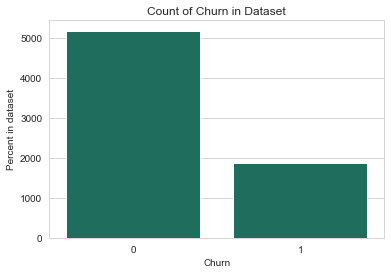

In [9]:
ax = sns.countplot(model_data['Churn'], color=dlsu_green)
ax.set_title('Count of Churn in Dataset')
ax.set_xlabel('Churn')
ax.set_ylabel('Percent in dataset')
plt.savefig('Churn Count.png')

In [15]:
model_data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
ax = plt.pie(model_data['Churn'].value_counts(), labels =model_data['Churn'].unique(), autopct='%.0f%%')

**what insights can you get from the target distribution? how will this affect our model? (2pts)**

From the distribution charts, it shows that 27% of the data shows churn and 73% shows the opposite. Thus, it could be inferred that the dataset is imbalanced and biased towards not churning.

## Model Development

**Store the independent variables to X and the dependent variable to y (2pts)**

In [50]:
X = model_data.drop('Churn', axis=1)
y = model_data['Churn']
print(X.shape)
print(y.shape)

(7043, 26)
(7043,)


**do a train-test split wherein 80% of the data is used for training and 20% is used for testing (2pts)**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

**build an initial KNN model and set the K to 5 and show the train & test accuracy (2 pts)**

In [52]:
clf = KNeighborsClassifier(n_neighbors = 5, p=2)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
y_pred = clf.predict(X_test)
print("Accuracy: {:.2f}".format(accuracy_score(y_test,y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred)))
print("F1 Score: {:.2f}".format(f1_score(y_test, y_pred)))

Accuracy: 0.78
Precision: 0.59
Recall: 0.48
F1 Score: 0.53


**should we trust accuracy as our metric for this problem? Why or why not? (3pts)**

Given the nature of the problem, the objective is to create a model that would fairly predict correctly whether or not the customer will churn. Thus, accuracy is not a fair evaluation. Additionally, the imbalanced dataset may have bias towards not churning, thus a more accurate metric would be to use F1 score to evaluate the model.

**Calculate accuracy, precision, recall & f1-score using different k parameters (2 to 20), store the results in a dataframe and  display dataframe content(2pts)**

In this case, we create multiple KNN models with varying values of k from 2 to 20. Its metrics are recorded and saved into a dataframe res_df.

In [58]:
res =[]
for k in range(2,21):
    clf = KNeighborsClassifier(n_neighbors=k, p =2)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    res.append([k, accuracy_score(y_test,y_pred), precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred)])
    
res_df = pd.DataFrame(res, columns=['k', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
res_df

,k,Accuracy,Precision,Recall,F1 Score
0,2,0.777857,0.687500,0.294906,0.412758
1,3,0.770759,0.579114,0.490617,0.531205
2,4,0.782115,0.661765,0.361930,0.467938
3,5,0.775018,0.592715,0.479893,0.530370
4,6,0.794180,0.691244,0.402145,0.508475
5,7,0.785664,0.627240,0.469169,0.536810
6,8,0.788502,0.679426,0.380697,0.487973
7,9,0.787083,0.635688,0.458445,0.532710
8,10,0.790632,0.678899,0.396783,0.500846
9,11,0.792761,0.661355,0.445040,0.532051


After evaluation of the models, we plot the metrics for each value of k and identify the maximum score of the recommended metric.

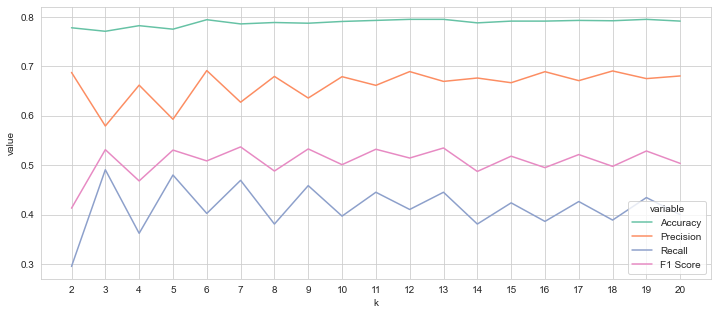

In [67]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=pd.melt(res_df, ['k']), x='k', y='value', hue='variable', ax=ax)
ax.xaxis.set_ticks(range(2,21,1))


In [75]:
res_df.iloc[[res_df['F1 Score'].idxmax()]]

,k,Accuracy,Precision,Recall,F1 Score
5,7,0.785664,0.62724,0.469169,0.53681


**Based on the results of using different K parameters, what k parameter would be your recommendation? What metric did you use as your basis for your recommendation and why? (3pts)**

Given the various K parameters, the recommended k parameter is **k at 7** which results in an **F1 score of 0.53681**. It is recommended that maximizing the F1 score would be the most appropriate given that the dataset is imbalanced and the objective of the problem is to correctly identify whether or not customers will churn.

## Creating a classification model using Logistic Regression

**Calculate accuracy, preicion, recall, f1-score by experimenting with different C and penalty values. The C and penalty values have been provided in the cell below. Store the results in a dataframe which contains columns penalty, c, accuracy, precision, recall and f1 (4pts)**

In this section, we iterate through each parameter testing all the combinations. Each model is evaluated and its scores are recorded in a dataframe res1_df.

In [103]:
penalty = ['l1', 'l2']
C = [0.1, 0.001, 0.0001, 1]

res1 = []
for i in penalty:
    for j in C:
        clf = LogisticRegression(penalty=i, C=j, solver='liblinear')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        res1.append([i, j, accuracy_score(y_test,y_pred), precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred)])

res1_df = pd.DataFrame(res1, columns=['Penalty', 'C', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
res1_df

,Penalty,C,Accuracy,Precision,Recall,F1 Score
0,l1,0.1000,0.822569,0.689231,0.600536,0.641834
1,l1,0.0010,0.784954,0.604790,0.541555,0.571429
2,l1,0.0001,0.734564,0.000000,0.000000,0.000000
3,l1,1.0000,0.819730,0.678679,0.605898,0.640227
4,l2,0.1000,0.823279,0.696203,0.589812,0.638607
5,l2,0.0010,0.811923,0.690141,0.525469,0.596651
6,l2,0.0001,0.786373,0.607143,0.546917,0.575458
7,l2,1.0000,0.821150,0.690852,0.587131,0.634783


The recorded scores are plotted on a bar chart for each model to be compared based on the recommended metric.

<AxesSubplot:xlabel='Params', ylabel='value'>

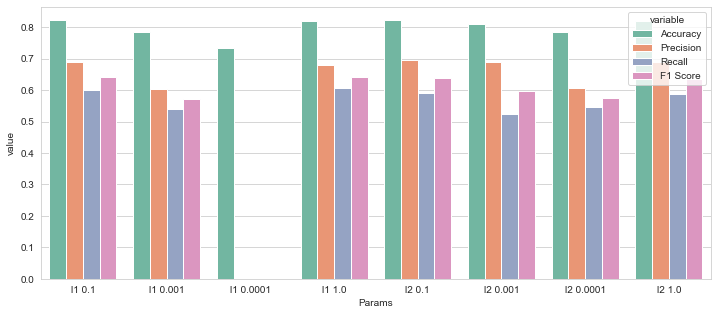

In [104]:
fig, ax = plt.subplots(figsize=(12,5))
res1_df['Params'] = res1_df['Penalty'] + ' ' + res1_df['C'].astype(str)
res1_df = res1_df.drop(['Penalty', 'C'], axis=1)
res1_df
sns.barplot(data=pd.melt(res1_df, ['Params']), x='Params', y='value', hue='variable', ax=ax)

In [93]:
res1_df.iloc[[res1_df['F1 Score'].idxmax()]]

,Accuracy,Precision,Recall,F1 Score,Params
4,0.822569,0.688073,0.603217,0.642857,l2 0.1


**Which setting would you recommend to use for building the classifier using logistic regression and why? (3pts)**

Based on the scores of various parameters, it is recommended that the combination using **l2 penalty** and **C at 0.1** is the optimal model as it maximized the **F1 score at 0.642857** which is the appropriate metric for evaluation given the nature of the problem.

**Using your recommended setting plot the feature importance of the model, What are your insights from the feature importance?What reconmmendations can you give to the company to help with the problem on churn? (5pts)**

In [96]:
clf = LogisticRegression(penalty='l2', C=0.1, solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

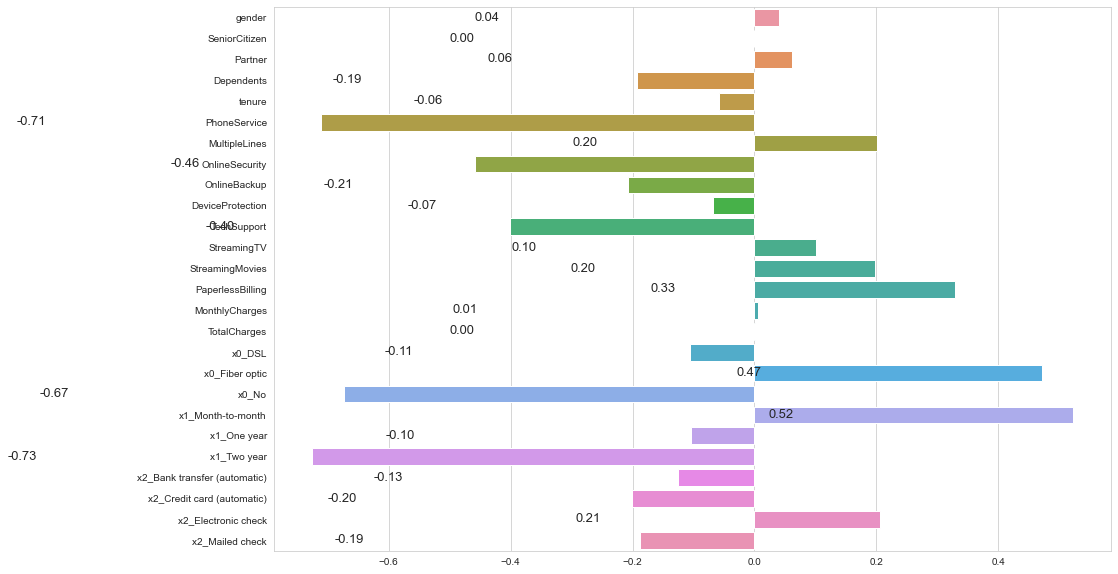

In [97]:
cols = X_train.columns.to_list()
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=clf.coef_[0], y=cols)

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width - .5,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center',
            fontsize=13)  # vertical alignment


Based on the feature importance graph above, it can be inferred that total charges, senior citizenship, and monthly charges are insignificant features to this model. It can also be inferred that gender, partner, tenure, and device protection are features of minimal concern in customer churn. Instead, the following insights can be drawn in addressing the issue of churn. 
- Two-year contracts, the absence of an ISP, a phone service, online security, and tech support are the top 5 characteristics that indicate a customer that is least likely to churn.
- Month-to-month contracts, a fiber optic ISP, and presence of multiple lines are characteristics of a customer that will churn.
- Paperless billing and movie streaming are features this model find significant in predicting churning.

As for recommendations, it is recommended that customers that fit in the churning demographic are offered longer contracts and provided better customer service and tech support to entice this demographic. It can also be recommended to explore further the reasons of clients who use multiple lines and create packages and offers based on their needs.